### Apriori algorithm 2022

In [1]:
# Import thư viện
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Đọc dữ liệu
file_path = 'D:/TTTN/CODE/Data Fixed/data.csv'
df = pd.read_csv(file_path)

In [3]:
# Đổi định dạng cột "Date Created"
df['Date Created'] = pd.to_datetime(df['Date Created'])

# Chọn các cột cần thiết
df_basket = df[['Date Created', 'Transaction Code', 'Short Item Code']]

In [4]:
# Lọc dữ liệu theo năm
df_22 = df_basket[((df_basket['Date Created'].dt.year == 2022) & (df_basket['Date Created'].dt.month.isin([6, 7, 11])))]

In [5]:
# Tạo danh sách chứa các giao dịch duy nhất
transaction_list = []
for i in df_22['Transaction Code'].unique():
    l = list(set(df_22[df_22['Transaction Code']==i]['Short Item Code']))
    if len(l) > 0:
        transaction_list.append(l)
        
print(len(transaction_list))

2272


In [6]:
transaction_list

[['J1165-P3F100'],
 ['J1151-P1S200', 'J1149-P1S100'],
 ['J1223-P1S200'],
 ['V0126-P1S100', 'V0307-P1F100'],
 ['J2110-P1F100'],
 ['V9407-P1S200', 'M8315-P1OS00'],
 ['J0427-P1F000'],
 ['J7339-P1OS00', 'J1172-P1S200', 'J1164-P3F100'],
 ['J7386-P1S100', 'J9118-P1F100', 'J1166-P1S200', 'J9118-P1OS00'],
 ['V9368-P2OS00', 'V9369-P2OS00'],
 ['M9107-P1OS00', 'V9134-P1S200', 'V9368-P2OS00', 'V9369-P2OS00'],
 ['V9407-P1S200', 'M9328-P1OS00', 'M8315-P1OS00', 'V0307-P1F000'],
 ['J1167-P1S200',
  'B0121-P1F100',
  'J0333-P1F000',
  'J0250-P1S000',
  'J1104-P1S100',
  'B0122-P1F100'],
 ['J1103-P1S100', 'B0122-P1F100'],
 ['M1003-P1F100', 'V0302-P1S100', 'V0395-P1S100', 'M6230-P1OS00'],
 ['V0380-P1F100', 'V0389-P1F100', 'V0352-P1S200'],
 ['B0121-P1F100'],
 ['V0389-P1F100'],
 ['V0108-P1S100', 'V0109-P1S100', 'V0103-P1F100'],
 ['J1122-P1S100', 'J1219-P3S200'],
 ['J1145-P1S100',
  'J1122-P1S100',
  'J9133-P1S200',
  'J1166-P1S200',
  'J1221-P3S200'],
 ['V0126-P1S100'],
 ['V0129-P1S100', 'V0128-P1F000'],
 

In [7]:
# Mã hóa dữ liệu
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
te_basket = pd.DataFrame(te_ary, columns=te.columns_)

te_basket.head()

,B0121-P1F100,B0122-P1F100,B0123-P1F100,B0124-P1F100,B3469-P1OS00,B3470-P1OS00,B3471-P1OS00,B3472-P1OS00,B5221-P1OS00,B5222-P1OS00,...,V9131-P1S000,V9131-P1S200,V9133-P1S200,V9134-P1S200,V9368-P2OS00,V9369-P2OS00,V9407-P1F200,V9407-P1S200,VHQ01-P1S100,VTUIV-P1S100
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Giá trị support và confidence
support_levels = [0.03, 0.02, 0.01, 0.005]
confidence_levels = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Tạo danh sách rỗng
rules_sup3 = []
rules_sup2 = []
rules_sup1 = []
rules_sup05 = []

# Thuật toán Apriori với giá trị support 3%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[0], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup3.append(len(rules))

# Thuật toán Apriori với giá trị support 2%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[1], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup2.append(len(rules))

# Thuật toán Apriori với giá trị support 1%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[2], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup1.append(len(rules))

# Thuật toán Apriori với giá trị support 0.5%
for confidence_level in confidence_levels:
    frequent_itemsets = apriori(te_basket, min_support=support_levels[3], use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
    rules_sup05.append(len(rules))

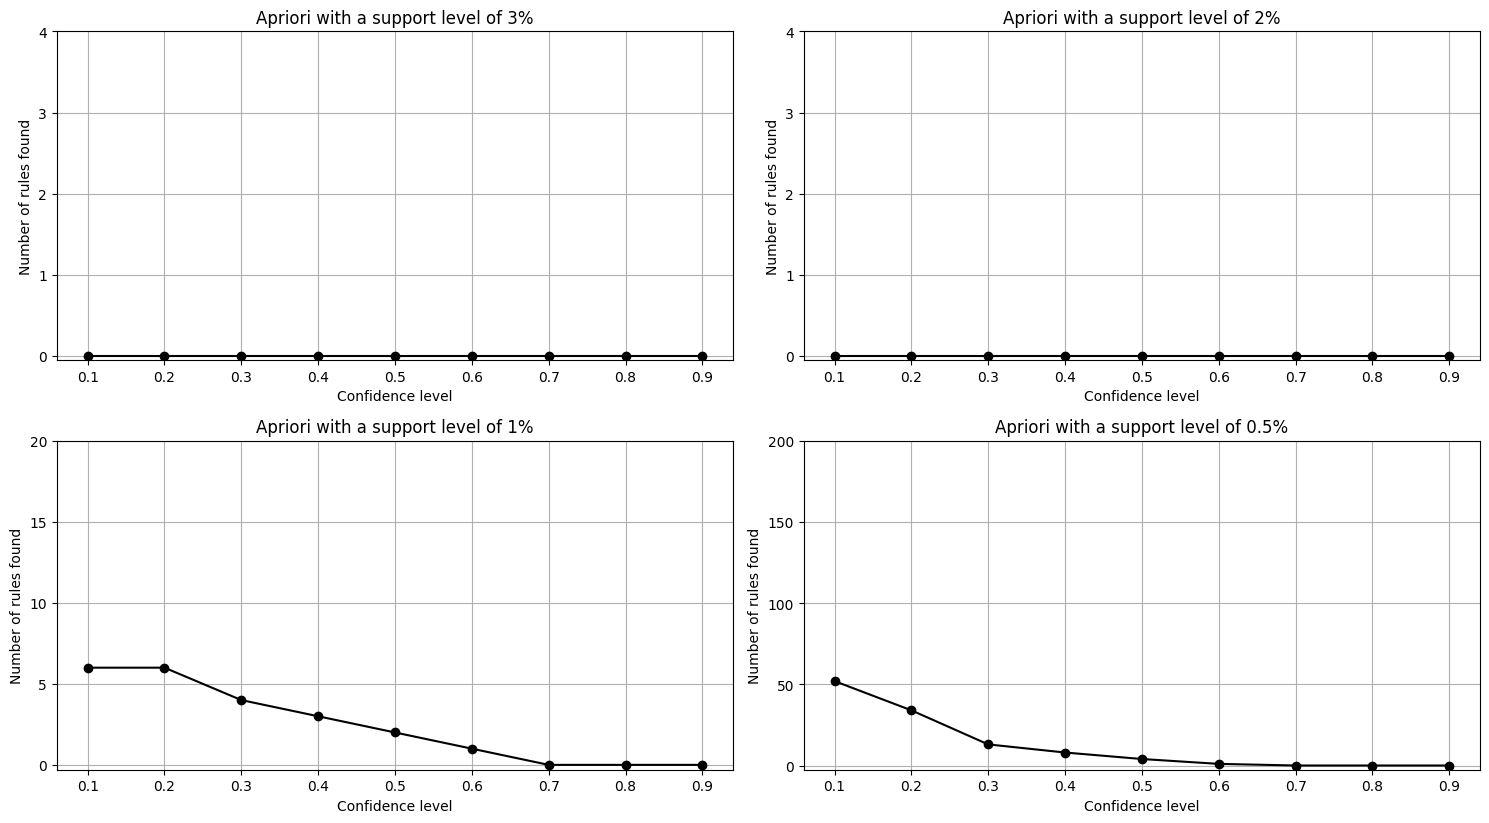

In [9]:
plt.figure(figsize=(15, 12))

# Số quy tắc được tìm thấy với support 3%
plt.subplot(3, 2, 1)
plt.plot(confidence_levels, rules_sup3, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 3%')
plt.yticks(np.arange(0, 5, 1))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Số quy tắc được tìm thấy với support 2%
plt.subplot(3, 2, 2)
plt.plot(confidence_levels, rules_sup2, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 2%')
plt.yticks(np.arange(0, 5, 1))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Số quy tắc được tìm thấy với support 1%
plt.subplot(3, 2, 3)
plt.plot(confidence_levels, rules_sup1, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 1%')
plt.yticks(np.arange(0, 25, 5))
plt.grid(True)
plt.gca().set_axisbelow(True)

# Số quy tắc được tìm thấy với support 0.5%
plt.subplot(3, 2, 4)
plt.plot(confidence_levels, rules_sup05, marker='o', linestyle='-', color='black')
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori with a support level of 0.5%')
plt.yticks(np.arange(0, 250, 50))
plt.grid(True)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

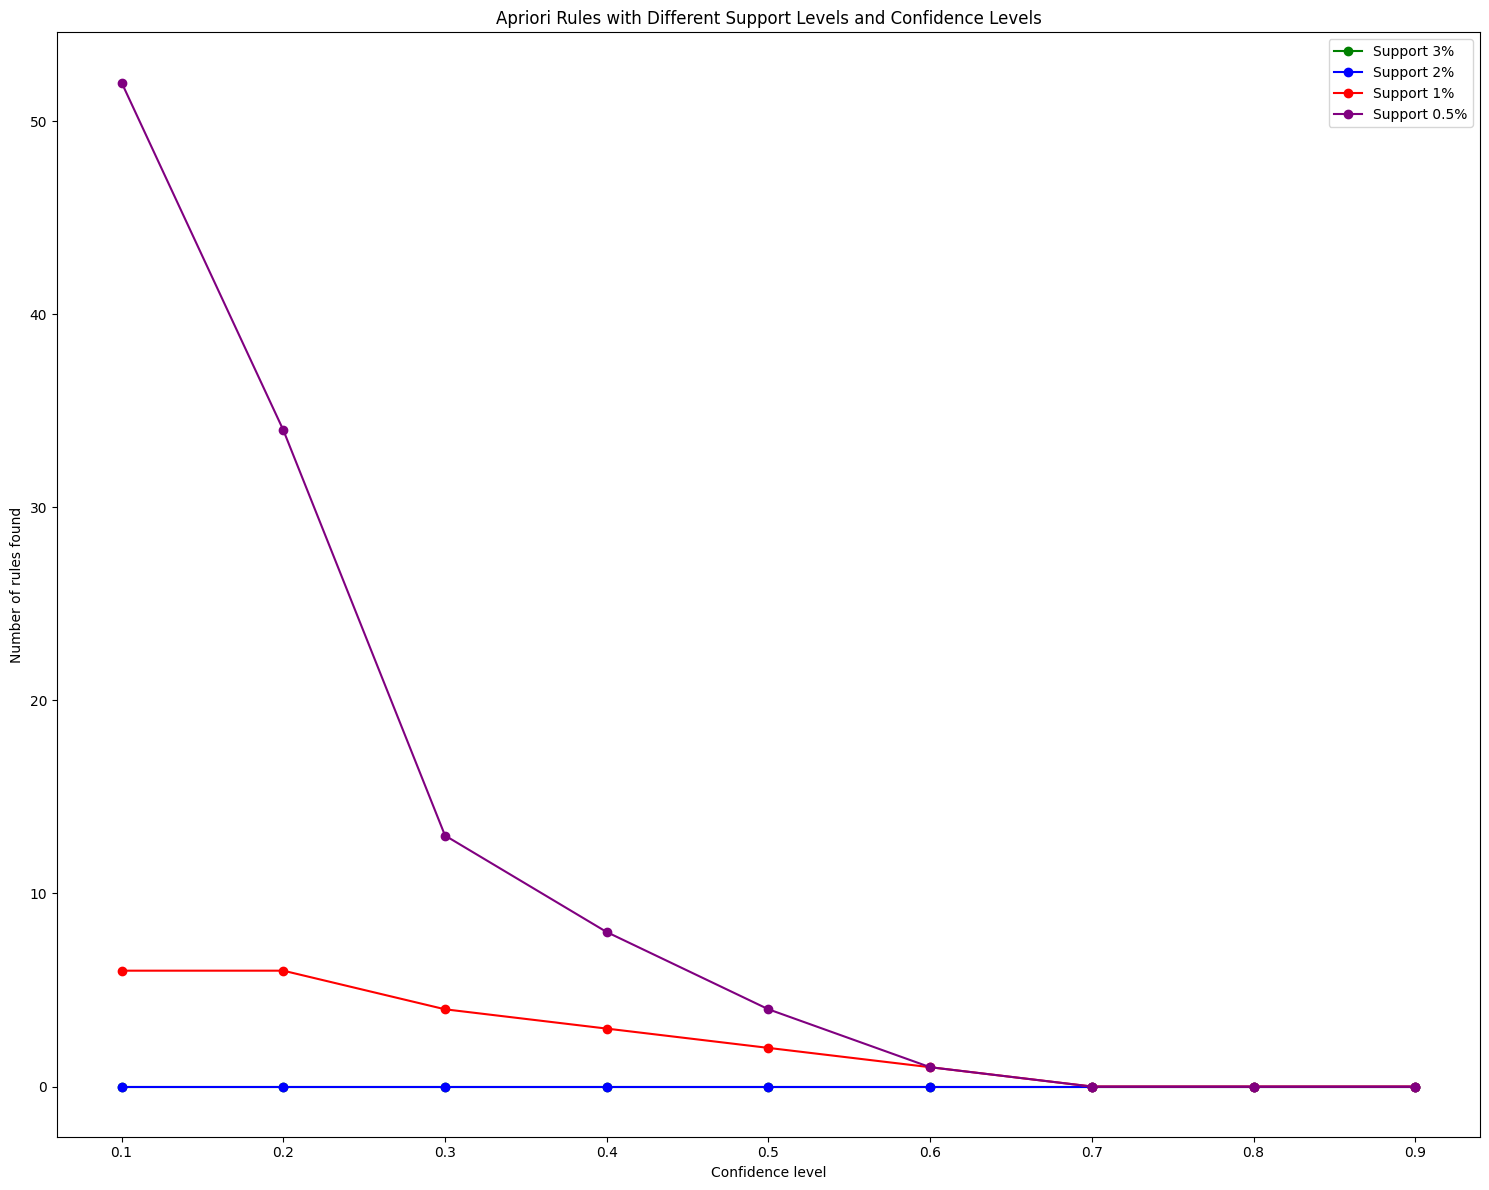

In [10]:
# Tùy chọn kích thước
plt.figure(figsize=(15, 12))

# Hiển thị tất cả trên cùng 1 biểu đồ
plt.plot(confidence_levels, rules_sup3, marker='o', linestyle='-', color='g', label='Support 3%')
plt.plot(confidence_levels, rules_sup2, marker='o', linestyle='-', color='b', label='Support 2%')
plt.plot(confidence_levels, rules_sup1, marker='o', linestyle='-', color='r', label='Support 1%')
plt.plot(confidence_levels, rules_sup05, marker='o', linestyle='-', color='purple', label='Support 0.5%')

# Đặt nhãn và tiêu đề
plt.xlabel('Confidence level')
plt.ylabel('Number of rules found')
plt.title('Apriori Rules with Different Support Levels and Confidence Levels')
plt.legend()

# Điều chỉnh bố cục hiển thị
plt.tight_layout()
plt.show()

In [11]:
# Xây dựng mô hình
frequent_itemsets = apriori(te_basket, min_support=support_levels[2], use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_levels[4])
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [12]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(J1176-P1S200),(J1173-P1S200),0.017606,0.020246,0.010563,0.600000,29.634783,0.010207,2.449384,0.983572
1,(J1173-P1S200),(J1176-P1S200),0.020246,0.017606,0.010563,0.521739,29.634783,0.010207,2.054097,0.986223


In [13]:
frequent_itemsets

,support,itemsets,length
0,0.018046,(B0121-P1F100),1
1,0.010123,(B0122-P1F100),1
2,0.010123,(B0124-P1F100),1
3,0.011004,(J0253-P1S200),1
4,0.015405,(J0332-P1S200),1
...,...,...,...
77,0.022887,(V9407-P1S200),1
78,0.023327,(VHQ01-P1S100),1
79,0.010563,"(J1176-P1S200, J1173-P1S200)",2
80,0.011004,"(V0371-P1S200, V0372-P1S200)",2


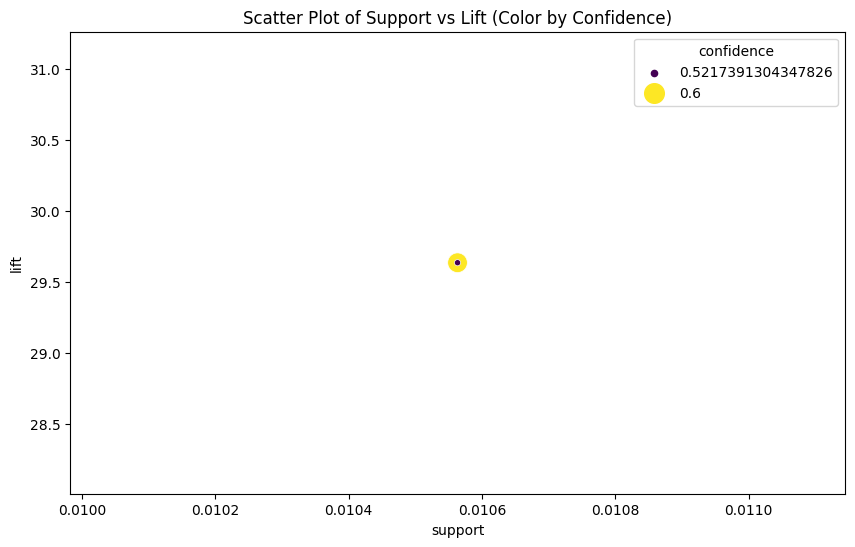

In [14]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='lift', data=rules, hue='confidence', palette='viridis', size='confidence', sizes=(20, 200))
plt.title('Scatter Plot of Support vs Lift (Color by Confidence)')
plt.xlabel('support')
plt.ylabel('lift')
plt.show()